In [56]:
from model_utils import artificial_lunar_landscapes, generate_image_paths
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
batch_size = 1
image_size = (480,720,1)

#training generator
input_dir, target_dir, input_img_paths, target_img_paths = generate_image_paths(
    target_dir='D:/TJPersonalCloud/Programming/msds-thesis-data/data-ml/split-data/train/mask-og', 
    input_dir='D:/TJPersonalCloud/Programming/msds-thesis-data/data-ml/split-data/train/render-og'
)
train_generator = artificial_lunar_landscapes(
    batch_size=batch_size,
    image_size=image_size,
    input_img_paths=input_img_paths,
    target_img_paths=target_img_paths
)


#test generator
input_dir, target_dir, input_img_paths, target_img_paths = generate_image_paths(
    target_dir='D:/TJPersonalCloud/Programming/msds-thesis-data/data-ml/split-data/test/mask-og', 
    input_dir='D:/TJPersonalCloud/Programming/msds-thesis-data/data-ml/split-data/test/render-og'
)
test_generator = artificial_lunar_landscapes(
    batch_size=batch_size,
    image_size=image_size,
    input_img_paths=input_img_paths,
    target_img_paths=target_img_paths
)



Number of images:  7813
Number of targets:  7813
Number of images:  1953
Number of targets:  1953


In [58]:
def iou_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return 1-iou

def weighted_bincrossentropy(true, pred, weight_zero = 0.4, weight_one = 1):
    """
    Calculates weighted binary cross entropy. The weights are fixed.
        
    This can be useful for unbalanced catagories.
    
    Adjust the weights here depending on what is required.
    
    For example if there are 10x as many positive classes as negative classes,
        if you adjust weight_zero = 1.0, weight_one = 0.1, then false positives 
        will be penalize 10 times as much as false negatives.
    """
  
    # calculate the binary cross entropy
    bin_crossentropy = keras.backend.binary_crossentropy(true, pred)
    
    # apply the weights
    weights = true * weight_one + (1. - true) * weight_zero
    weighted_bin_crossentropy = weights * bin_crossentropy 

    return keras.backend.mean(weighted_bin_crossentropy)

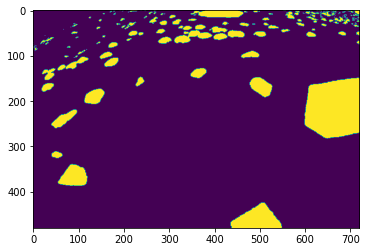

In [87]:
plt.imshow(train_generator[1][1][0])

In [107]:
model = load_model('D:/ProgrammingD/github/thesis/modeling/results/custom-modeling/y-model-2-unet/checkpoints/traintestrun-0.4bce/model.07-0.45-0.95.h5', custom_objects={'iou_coef': iou_coef})
#model = load_model('D:/ProgrammingD/github/thesis/modeling/results/custom-modeling/y-model-1-unet/checkpoints/traintestrun/model.20-0.07-0.86.h5', custom_objects={'weighted_bincrossentropy':weighted_bincrossentropy})

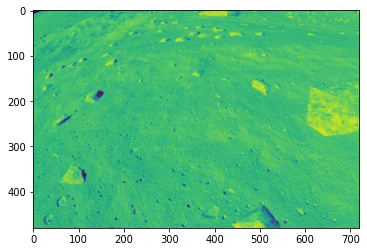

In [108]:
plt.imshow(train_generator[1][0][0])

In [109]:
pred = model.predict(train_generator[1][0])

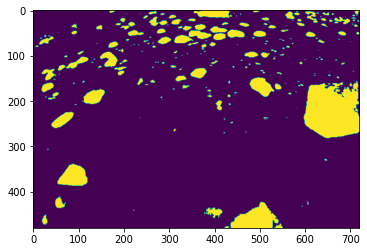

In [110]:
plt.imshow(pred[0])

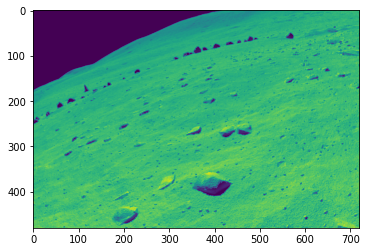

In [111]:
plt.imshow(test_generator[1][0][0])

In [112]:
pred_test = model.predict(test_generator[1][0])

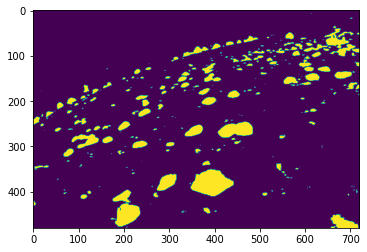

In [113]:
plt.imshow(pred_test[0])

In [125]:
img_bennu = load_img('D:/TJPersonalCloud/Programming/msds-thesis-data/data-ml/split-data/bennu-validation/3360_5040.jpg', color_mode='grayscale')
img_bennu = img_to_array(img_bennu)/255./1.5

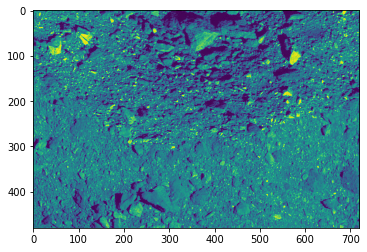

In [126]:
plt.imshow(img_bennu)

In [116]:
np.expand_dims(img_bennu, axis=0).shape

(1, 480, 720, 1)

In [127]:
pred_bennu = model.predict(np.expand_dims(img_bennu, axis=0))

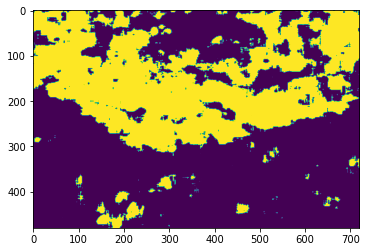

In [128]:
plt.imshow(pred_bennu[0])

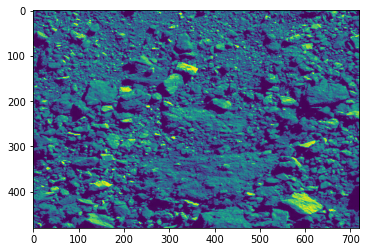

In [119]:
img_bennu = load_img('D:/TJPersonalCloud/Programming/msds-thesis-data/data-ml/split-data/bennu-validation/5760_4320.jpg', color_mode='grayscale')
img_bennu = img_to_array(img_bennu)/255./1.5
plt.imshow(img_bennu)

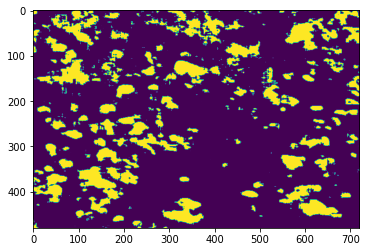

In [120]:
pred_bennu = model.predict(np.expand_dims(img_bennu, axis=0))
plt.imshow(pred_bennu[0])